In [121]:
import sys, os
import numpy as np
import time, h5py
codepath = '/user_data/mmhender/imStat/code'
sys.path.append(codepath)
from utils import default_paths, nsd_utils, numpy_utils, stats_utils
from model_fitting import initialize_fitting 
import argparse
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import scipy.stats
import cmocean
import pandas as pd

from plotting import load_fits, plot_utils

In [122]:

subject =1;
which_prf_grid = 5
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)
n_prfs = len(models)

save_name_groups = os.path.join(default_paths.stim_labels_root,'All_concat_labelgroupnames.npy')
groups = np.load(save_name_groups, allow_pickle=True).item()
discrim_type_list = groups['discrim_type_list']
n_discrim_types = len(discrim_type_list)

path_to_load = default_paths.sketch_token_feat_path  
path_to_load = os.path.join(path_to_load, 'feature_stats')

feature_type='sketch_tokens'
fn1 = os.path.join(path_to_load, 'S%d_%s_mean_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_var_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn3 = os.path.join(path_to_load, 'S%d_%s_covar_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn4 = os.path.join(path_to_load, 'S%d_%s_semantic_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn5 = os.path.join(path_to_load, 'S%d_%s_semantic_discrim_tstat_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn6 = os.path.join(path_to_load, 'S%d_%s_nsamp_grid%d.npy'%(subject, feature_type, which_prf_grid))

print('loading from %s and %s and %s'%(fn1, fn2, fn3))
print('loading from %s and %s and %s'%(fn4, fn5, fn6))
mean_result = np.load(fn1,allow_pickle=True)
var_result = np.load(fn2,allow_pickle=True)
covar_result = np.load(fn3,allow_pickle=True)
corr_result = np.load(fn4,allow_pickle=True)*(-1)
discrim_result = np.load(fn5,allow_pickle=True)*(-1)
nsamp_result = np.load(fn6,allow_pickle=True)


number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]
loading from /user_data/mmhender/features/sketch_tokens/feature_stats/S1_sketch_tokens_mean_grid5.npy and /user_data/mmhender/features/sketch_tokens/feature_stats/S1_sketch_tokens_var_grid5.npy and /user_data/mmhender/features/sketch_tokens/feature_stats/S1_sketch_tokens_covar_grid5.npy
loading from /user_data/mmhender/features/sketch_tokens/feature_stats/S1_sketch_tokens_semantic_corrs_grid5.npy and /user_data/mmhender/features/sketch_tokens/feature_stats/S1_sketch_tokens_semantic_discrim_tstat_grid5.npy and /user_data/mmhender/features/sketch_tokens/feature_stats/S1_sketch_tokens_nsamp_grid5.npy


In [123]:
allbad = np.where(np.all(np.all(np.isnan(discrim_result), axis=0), axis=0))
np.array(discrim_type_list)[allbad]

array([], dtype='<U22')

In [124]:
allgood = np.where(np.all(np.all(~np.isnan(discrim_result), axis=0), axis=0))
np.array(discrim_type_list)[allgood]

array(['indoor_outdoor', 'natural_humanmade', 'animacy', 'accessory',
       'animal', 'appliance', 'electronic', 'food', 'furniture', 'indoor',
       'kitchen', 'outdoor', 'person', 'sports', 'vehicle',
       'within_accessory', 'within_animal', 'within_appliance',
       'within_electronic', 'within_food', 'within_furniture',
       'within_indoor', 'within_kitchen', 'within_outdoor',
       'within_vehicle', 'building', 'ceiling', 'floor', 'food-stuff',
       'furniture-stuff', 'ground', 'other', 'plant', 'raw-material',
       'sky', 'solid', 'structural', 'textile', 'wall', 'water', 'window',
       'within_building', 'within_floor', 'within_food-stuff',
       'within_furniture-stuff', 'within_ground', 'within_plant',
       'within_raw-material', 'within_solid', 'within_structural',
       'within_textile', 'within_wall', 'within_water'], dtype='<U22')

In [125]:
somebad = np.where(~np.all(np.all(np.isnan(discrim_result), axis=0), axis=0) & \
                   np.any(np.any(np.isnan(discrim_result), axis=0), axis=0))

np.array(discrim_type_list)[somebad]

array(['within_sports'], dtype='<U22')

/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/mmhender/myenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


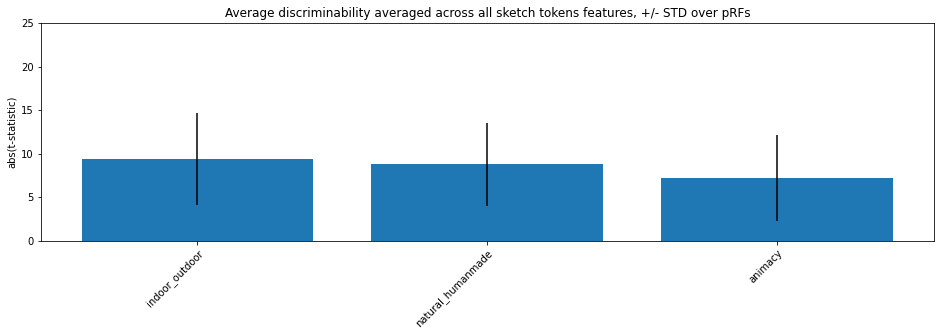

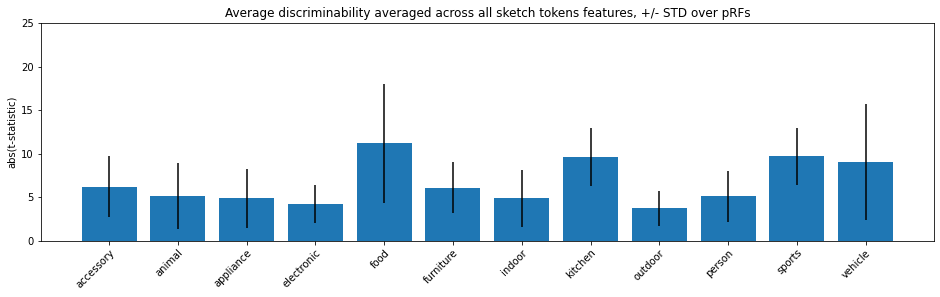

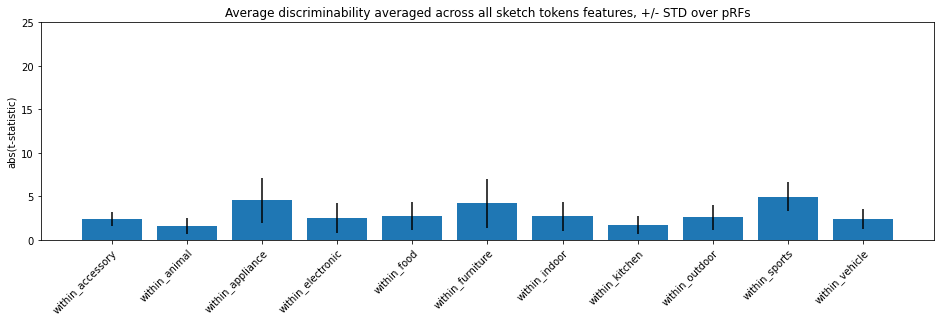

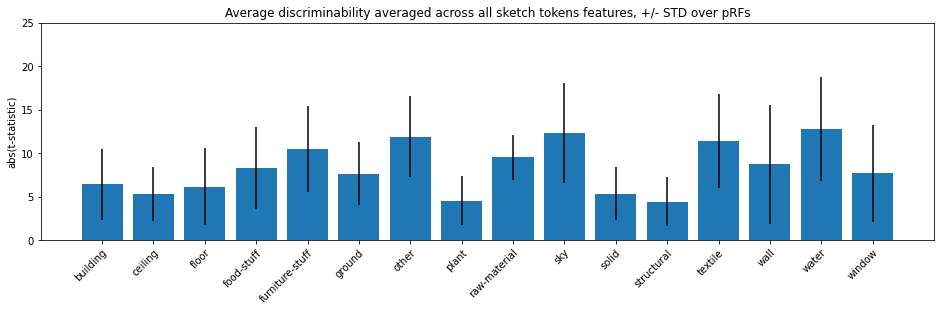

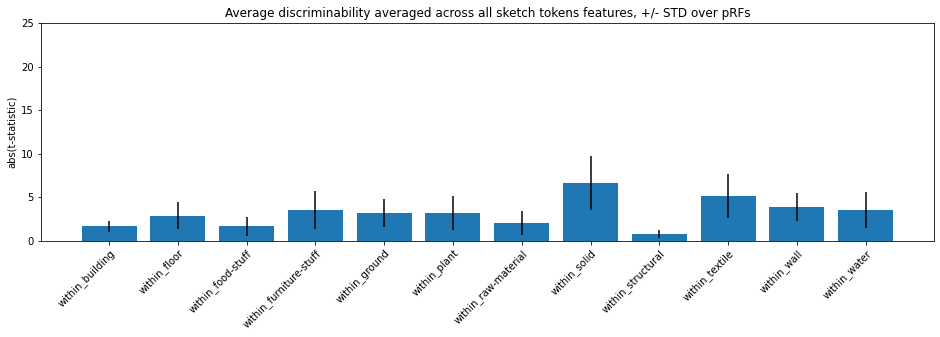

In [126]:
inds_list = [np.arange(0,3), np.arange(3,15), np.arange(15,26), np.arange(26,42), np.arange(42,54)]

for inds in inds_list:

    plt.figure(figsize=(16,4));
    mean_vals = np.nanmean(np.nanmean(np.abs(discrim_result[:,:,inds]), axis=0), axis=0)
    std_vals = np.nanmean(np.nanstd(np.abs(discrim_result[:,:,inds]), axis=0), axis=0)
    plt.bar(np.arange(len(inds)), mean_vals)
    plt.errorbar(np.arange(len(inds)), mean_vals, std_vals, \
                 ecolor='k',zorder=10, ls='none')
    plt.xticks(np.arange(len(inds)), np.array(discrim_type_list)[inds], \
               rotation=45,ha='right',rotation_mode='anchor')
    
    plt.title('Average discriminability averaged across all sketch tokens features, +/- STD over pRFs')
    plt.ylim([0,25])
    plt.ylabel('abs(t-statistic)')
    

In [187]:
# Gather information about the sketch tokens feature channels
feature_stats_file = os.path.join(default_paths.sketch_token_feat_path, \
                                  'cluster_ims_curv_rect_values.csv')
feature_stats = pd.read_csv(feature_stats_file)
feature_stats
best_scale = np.array(feature_stats['best_scale'])
ori_rad = np.array(feature_stats['best_orient'])
ori_deg = ori_rad/(np.pi)*180
ori_deg = np.mod(ori_deg, 180)
ori_unique, ori_inds = np.unique(ori_deg, return_inverse=True)
n_ori = len(ori_unique)
bend = np.array(feature_stats['best_bend'])
bend_unique, bend_inds  = np.unique(bend, return_inverse=True)
n_bend = len(bend_unique)

In [188]:
ori_unique

array([  0.,   5.,   5.,  10.,  15.,  20.,  25.,  30.,  40.,  40.,  45.,
        50.,  50.,  55.,  55.,  60.,  60.,  65.,  70.,  75.,  80.,  85.,
        90.,  95., 100., 105., 110., 110., 115., 120., 125., 125., 130.,
       135., 140., 145., 145., 150., 155., 160., 165., 170., 175.])

In [190]:
# Gather actual fit parameters for the sketch tokens encoding model

subject = 1
fitting_type = 'sketch_tokens'
out = load_fits.load_fit_results(subject, fitting_type, n_from_end=0,verbose=True);

w = out['best_params'][1][:,:,0]
feature_corrs = out['corr_each_feature']

feature_weights = out['best_params'][1][:,:,0]
feature_corr = out['corr_each_feature']
n_voxels = feature_weights.shape[0]

# find maxes. if they are constant across features, then set to nan.
preferred_feat_corr = np.argmax(feature_corr, axis=1).astype(np.float32)
is_constant = np.all(np.tile(feature_corr[:,0:1], [1,150])==feature_corr, axis=1)
preferred_feat_corr[is_constant] = np.nan
assert(not np.any(np.isnan(preferred_feat_corr)))

preferred_ori_corr = ori_deg[preferred_feat_corr.astype(int)]
preferred_bend_corr = bend[preferred_feat_corr.astype(int)]


loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Feb-05-2022_2057_02/all_fit_params.npy

dict_keys(['subject', 'volume_space', 'fitting_types', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'ridge', 'debug', 'up_to_sess', 'single_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'saved_prfs_fn', 'best_layer_each_voxel', 'saved_best_layer_fn', 'voxel_subset_is_done_trn', 'voxel_subset_is_done_val', 'corr_each_feature', 'sem_discrim_each_axis', 'sem_corr_each_axis', 'discrim_type_list', 'n_sem_samp_each_axis', 'use_pca_st_feats'])


Text(0, 0.5, 'n feature_total')

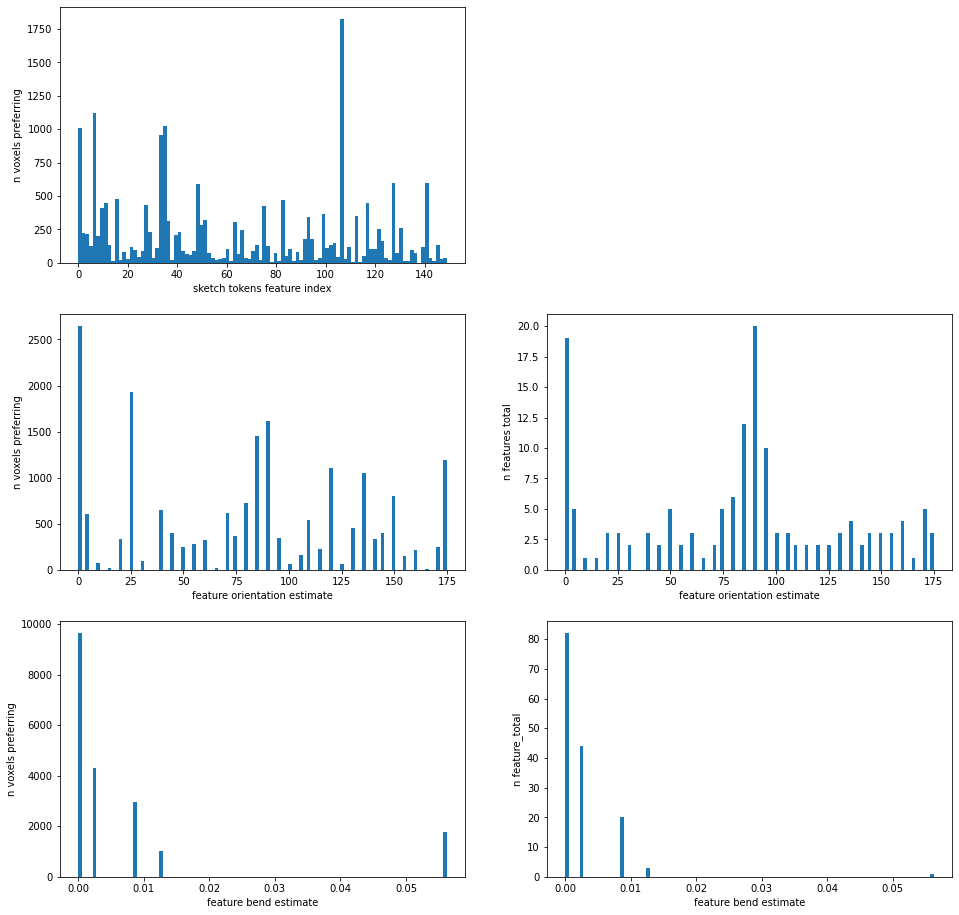

In [191]:
# plot the basic distribution of feature preferences over voxels

plt.figure(figsize=(16,16));
plt.subplot(3,2,1)
plt.hist(preferred_feat_corr, 100);
plt.xlabel('sketch tokens feature index')
plt.ylabel('n voxels preferring')

plt.subplot(3,2,3)
plt.hist(preferred_ori_corr, 100);
plt.xlabel('feature orientation estimate')
plt.ylabel('n voxels preferring')

plt.subplot(3,2,4)
plt.hist(ori_deg, 100);
plt.xlabel('feature orientation estimate')
plt.ylabel('n features total')

plt.subplot(3,2,5)
plt.hist(preferred_bend_corr, 100);
plt.xlabel('feature bend estimate')
plt.ylabel('n voxels preferring')

plt.subplot(3,2,6)
plt.hist(bend, 100);
plt.xlabel('feature bend estimate')
plt.ylabel('n feature_total')



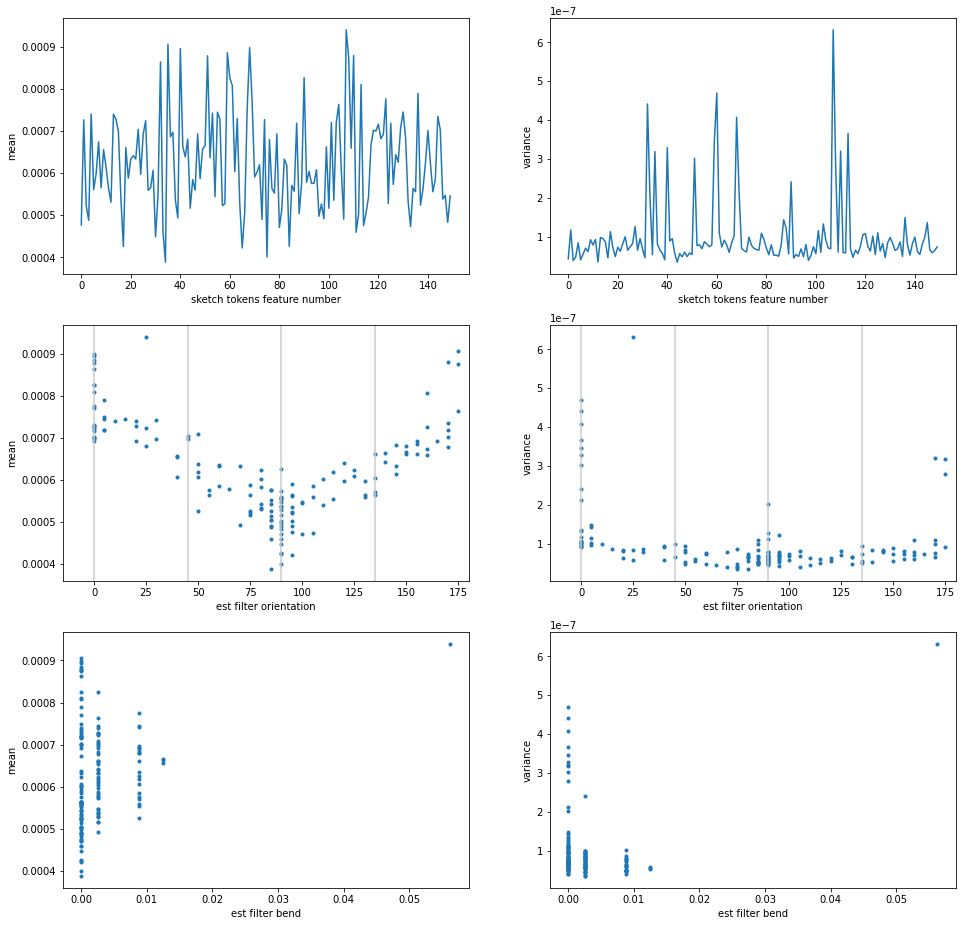

In [192]:
# Plot mean/variance each feature channel
# Averaged across pRFs

plt.figure(figsize=(16,16))

plt.subplot(3,2,1)
plt.plot(np.mean(mean_result, axis=1)[0:150])
plt.xlabel('sketch tokens feature number');
plt.ylabel('mean');
plt.subplot(3,2,2)
plt.plot(np.mean(var_result, axis=1)[0:150])
plt.xlabel('sketch tokens feature number');
plt.ylabel('variance');

   
plt.subplot(3,2,3)
plt.plot(ori_deg, np.mean(mean_result, axis=1),'.')
plt.xlabel('est filter orientation');
plt.ylabel('mean');
plt.xlim([-15, 180])
for ii in np.arange(0,180,45):
    plt.axvline(ii, color=[0.8, 0.8, 0.8])

plt.subplot(3,2,4)
plt.plot(ori_deg, np.mean(var_result, axis=1),'.')
plt.xlabel('est filter orientation');
plt.ylabel('variance');
plt.xlim([-15, 180])
for ii in np.arange(0,180,45):
    plt.axvline(ii, color=[0.8, 0.8, 0.8])
    
plt.subplot(3,2,5)
plt.plot(bend, np.mean(mean_result, axis=1),'.')
plt.xlabel('est filter bend');
plt.ylabel('mean');

plt.subplot(3,2,6)
plt.plot(bend, np.mean(var_result, axis=1),'.')
plt.xlabel('est filter bend');
plt.ylabel('variance');


Text(0.5, 0.98, 'Covariance of gabor features, across entire image set\n(averaged over pRFs)')

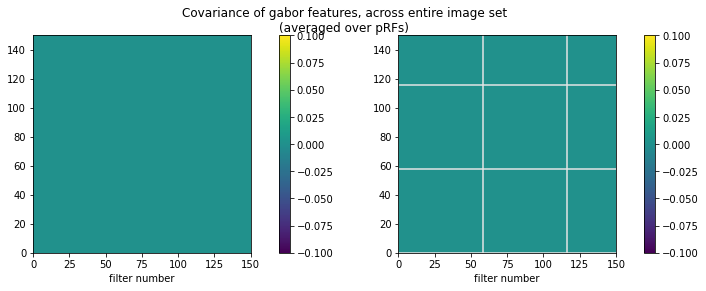

In [164]:
# Plot covariance 

plt.figure(figsize=(12,4));

plt.subplot(1,2,1)
plt.pcolormesh(np.mean(covar_result, axis=2))
plt.colorbar()
plt.axis('square')
plt.xlabel('filter number')
plt.xlabel('filter number')

plt.subplot(1,2,2)
plt.pcolormesh(np.mean(covar_result, axis=2))
plt.colorbar()
plt.axis('square')
plt.xlabel('filter number')
plt.xlabel('filter number')
for ii in range(n_sf):
    plt.axvline(ii*n_ori, color=[0.9, 0.9, 0.9])
    plt.axhline(ii*n_ori, color=[0.9, 0.9, 0.9])
    
plt.suptitle('Covariance of sketch tokens features, across entire image set\n(averaged over pRFs)')

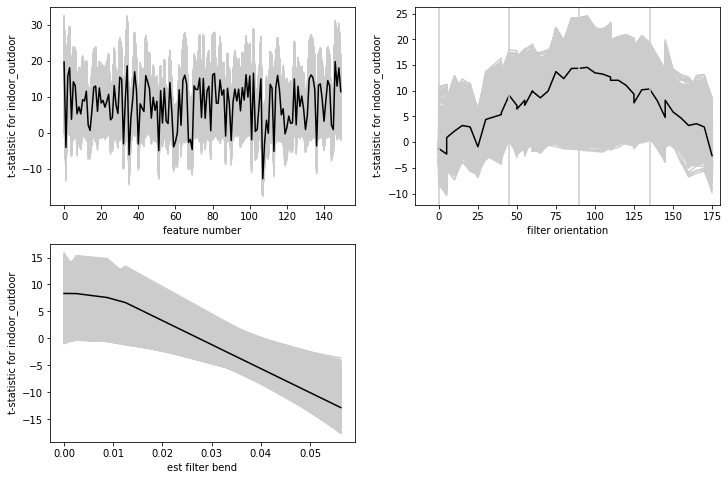

In [193]:
# Plot t-statistic of feature channels with semantic features
# Gray lines are individual pRFs

dd = 0;

plt.figure(figsize=(12,8));

plt.subplot(2,2,1)
plt.plot(discrim_result[:,:,dd], color = [0.8, 0.8, 0.8])
plt.plot(np.mean(discrim_result[:,:,dd], axis=1), color='k')
plt.xlabel('feature number');
plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);

plt.subplot(2,2,2)
mean_each_orient = np.zeros([n_ori, n_prfs])
for oo in range(n_ori):
    inds = ori_inds==oo
    mean_each_orient[oo,:] = np.mean(discrim_result[inds,:,dd], axis=0)
plt.plot(ori_unique, mean_each_orient, color=[0.8, 0.8, 0.8])
plt.plot(ori_unique, np.mean(mean_each_orient, axis=1), color='k')
plt.xlabel('filter orientation');
plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);
plt.xlim([-15, 180])
for ii in np.arange(0,180,45):
    plt.axvline(ii, color=[0.8, 0.8, 0.8])
    
plt.subplot(2,2,3)
mean_each_bend = np.zeros([n_bend, n_prfs])
for bb in range(n_bend):
    inds = bend_inds==bb
    mean_each_bend[bb,:] = np.mean(discrim_result[inds,:,dd], axis=0)
plt.plot(bend_unique, mean_each_bend, color=[0.8, 0.8, 0.8])
plt.plot(bend_unique, np.mean(mean_each_bend, axis=1), color='k')
plt.xlabel('est filter bend');
plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);

 
 

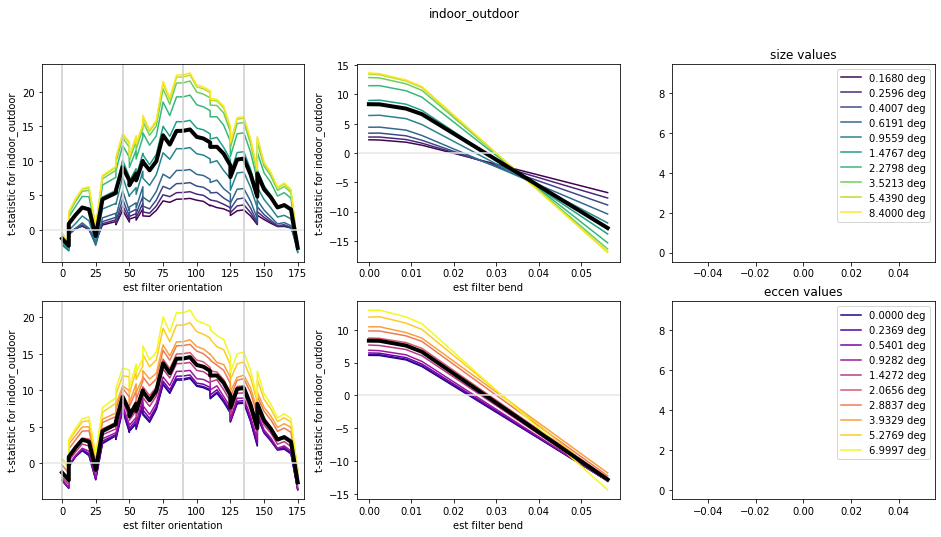

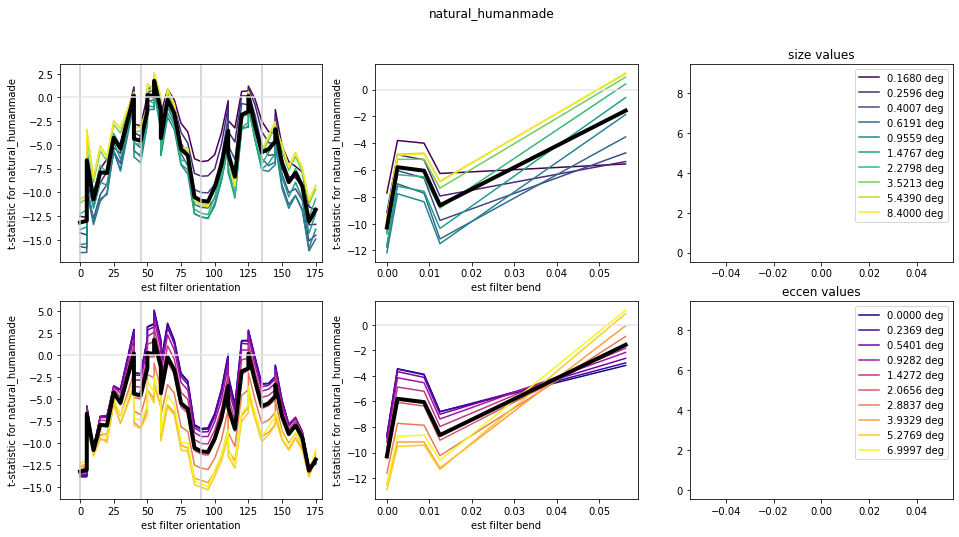

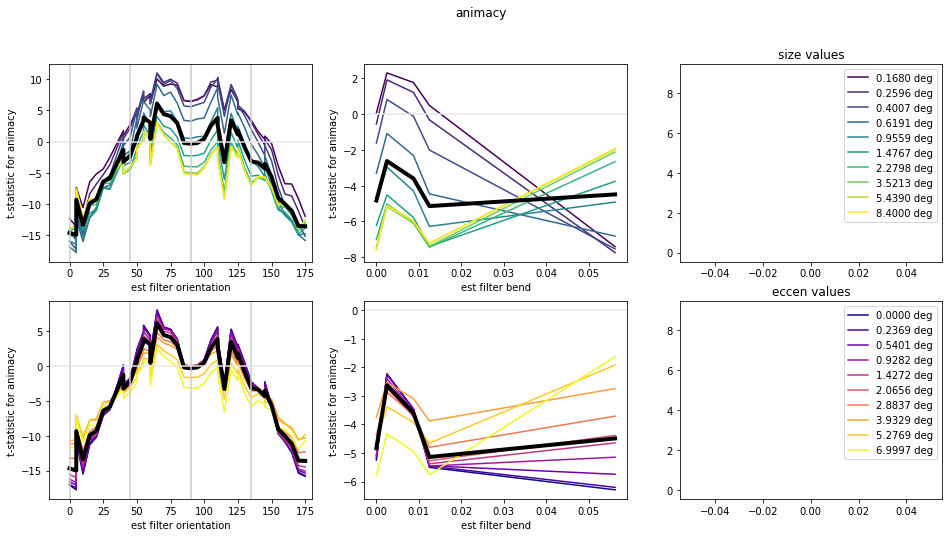

In [194]:
# Feature/semantic discriminability, separated by size/eccen of pRFs.

unique_sizes, size_inds = np.unique(np.round(prf_models[:,2],4), return_inverse=True)
size_colors = cm.viridis(np.linspace(0,1,len(unique_sizes)))

eccens = np.sqrt(prf_models[:,0]**2+prf_models[:,1]**2)
unique_eccens, eccen_inds = np.unique(np.round(eccens,4), return_inverse=True)
eccen_colors = cm.plasma(np.linspace(0,1,len(unique_eccens)))

# for dd in range(len(discrim_type_list)):
# for dd in range(10):
for dd in [0,1,2]:

    plt.figure(figsize=(16,8));

    plt.subplot(2,3,1)
    mean_each_orient = np.zeros([n_ori, n_prfs])
    for oo in range(n_ori):
        inds = ori_inds==oo
        mean_each_orient[oo,:] = np.mean(discrim_result[inds,:,dd], axis=0)
    for ss in range(len(unique_sizes)):
        inds = size_inds==ss
        plt.plot(ori_unique, np.mean(mean_each_orient[:,inds], axis=1), color=size_colors[ss,:])
    plt.plot(ori_unique, np.mean(mean_each_orient, axis=1), color='k', linewidth=4)
    plt.xlabel('est filter orientation');
    plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);
    plt.xlim([-15, 180])
    for ii in np.arange(0,180,45):
        plt.axvline(ii, color=[0.8, 0.8, 0.8])
    plt.axhline(0, color=[0.9, 0.9, 0.9]);

    plt.subplot(2,3,2)
    mean_each_bend = np.zeros([n_bend, n_prfs])
    for bb in range(n_bend):
        inds = bend_inds==bb
        mean_each_bend[bb,:] = np.mean(discrim_result[inds,:,dd], axis=0)
    for ss in range(len(unique_sizes)):
        inds = size_inds==ss
        plt.plot(bend_unique, np.mean(mean_each_bend[:,inds], axis=1), color=size_colors[ss,:])
#     plt.plot(sf_unique, mean_each_freq, color=[0.8, 0.8, 0.8])
    plt.plot(bend_unique, np.mean(mean_each_bend, axis=1), color='k', linewidth=4)
    plt.xlabel('est filter bend');
    plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);
    plt.axhline(0, color=[0.9, 0.9, 0.9]);
    
    plt.subplot(2,3,3);
    for ss in range(len(unique_sizes)):
        plt.plot(0,ss,color=size_colors[ss,:])    
    plt.legend(['%.4f deg'%(unique_sizes[ss]*8.4) for ss in range(len(unique_sizes))])
    plt.title('size values')
    
    plt.subplot(2,3,4)
    for ee in range(len(unique_eccens)):
        inds = eccen_inds==ee
        plt.plot(ori_unique, np.mean(mean_each_orient[:,inds], axis=1), color=eccen_colors[ee,:])
    plt.plot(ori_unique, np.mean(mean_each_orient, axis=1), color='k', linewidth=4)
    plt.xlabel('est filter orientation');
    plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);
    plt.xlim([-15, 180])
    for ii in np.arange(0,180,45):
        plt.axvline(ii, color=[0.8, 0.8, 0.8])
    plt.axhline(0, color=[0.9, 0.9, 0.9]);

    plt.subplot(2,3,5)
    for ee in range(len(unique_eccens)):
        inds = eccen_inds==ee
        plt.plot(bend_unique, np.mean(mean_each_bend[:,inds], axis=1), color=eccen_colors[ee,:])
#     plt.plot(sf_unique, mean_each_freq, color=[0.8, 0.8, 0.8])
    plt.plot(bend_unique, np.mean(mean_each_bend, axis=1), color='k', linewidth=4)
    plt.xlabel('est filter bend');
    plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);
    plt.axhline(0, color=[0.9, 0.9, 0.9]);
    
    plt.subplot(2,3,6);
    for ee in range(len(unique_eccens)):
        plt.plot(0,ee,color=eccen_colors[ee,:])    
    plt.legend(['%.4f deg'%(unique_eccens[ee]*8.4) for ee in range(len(unique_eccens))])
    plt.title('eccen values')
    
    plt.suptitle(discrim_type_list[dd])

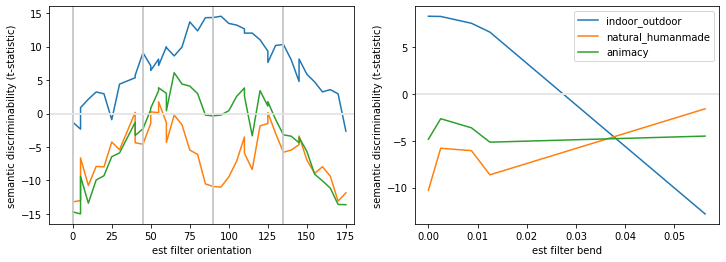

In [196]:
# Average over pRFs, overlaying different semantic content

plt.figure(figsize=(12,4));
lh = []
# for dd in range(len(discrim_type_list)):
for dd in range(3):

    
    plt.subplot(1,2,1)
    mean_each_orient = np.zeros([n_ori, n_prfs])
    for oo in range(n_ori):
        inds = ori_inds==oo
        mean_each_orient[oo,:] = np.mean(discrim_result[inds,:,dd], axis=0)
    plt.plot(ori_unique, np.mean(mean_each_orient, axis=1))   
    plt.xlabel('est filter orientation');
    plt.xlim([-15, 180])
    for ii in np.arange(0,180,45):
        plt.axvline(ii, color=[0.8, 0.8, 0.8])
    plt.axhline(0, color=[0.9, 0.9, 0.9])
    plt.ylabel('semantic discriminability (t-statistic)')
    
    ax = plt.subplot(1,2,2)
    mean_each_bend = np.zeros([n_bend, n_prfs])
    for bb in range(n_bend):
        inds = bend_inds==bb
        mean_each_bend[bb,:] = np.mean(discrim_result[inds,:,dd], axis=0)
    l, = ax.plot(bend_unique, np.mean(mean_each_bend, axis=1))
    lh.append(l)
    plt.xlabel('est filter bend');
    plt.axhline(0, color=[0.9, 0.9, 0.9]);
    plt.ylabel('semantic discriminability (t-statistic)')
    
plt.legend(lh, discrim_type_list)

[2.363983154296875, 15.919586181640625]
[3.461551401073848e-08, 6.328687049972359e-07]


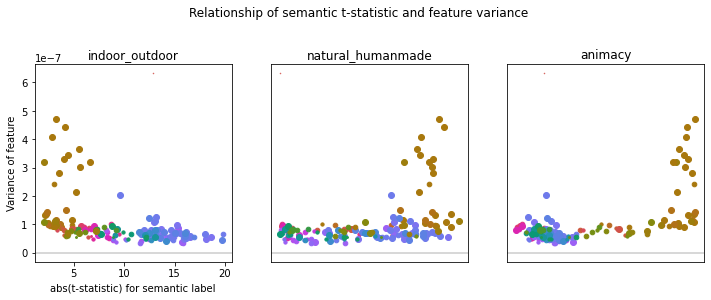

In [201]:
# Plot relationship between feature channels' variance, and semantic informativeness

n_color_steps = n_ori
# colors = cm.plasma(np.linspace(0,1,n_color_steps))
colors = cmocean.cm.phase(np.linspace(0,1,n_color_steps))

n_size_steps = n_bend
sizes = np.linspace(12,1,n_bend)
# sizes = np.linspace(12,12,n_sf)

# dorder = [0,2,3,4,1,5]

plt.figure(figsize=(12,8))
npx = 2
npy = 3

pi=0

for dd in range(3):

#     xlims = [1, 17]
#     ylims = [0.00013, 0.0013]
#     xlims = [np.min(np.mean(discrim_result[:,:,dd], axis=1))-0.02, \
#              np.max(np.mean(discrim_result[:,:,dd], axis=1))+0.02]
#     ylims = [np.min(np.mean(var_result, axis=1))-0.000002, \
#              np.max(np.mean(var_result, axis=1))+0.000002]

    running_xmin=100; running_ymin=100;
    running_xmax=-100; running_ymax=-100;
    pi+=1
    plt.subplot(npx,npy,pi)
 
    xvals = np.mean(np.abs(discrim_result[:,:,dd]), axis=1)
    yvals = np.mean(var_result, axis=1)

    running_xmin = np.min([running_xmin, np.min(xvals)])
    running_ymin = np.min([running_ymin, np.min(yvals)])
    running_xmax = np.max([running_xmax, np.max(xvals)])
    running_ymax = np.max([running_ymax, np.max(yvals)])

    for oo in range(n_ori):
#                     inds = np.where(orient_inds==oo)[0]
#                     plt.plot(np.mean(xvals[inds]), np.mean(yvals[inds]), '.',\
#                              color=colors[oo,:], markersize=sizes[sf])
        for bb in range(n_bend):
            inds = np.where((ori_inds==oo) & (bend_inds==bb))[0]
            plt.plot(xvals[inds], yvals[inds],'.',color=colors[oo,:], markersize=sizes[bb])
                
    if pi==1:
        plt.xlabel('abs(t-statistic) for semantic label')
        plt.ylabel('Variance of feature')
    else:
        plt.xticks([])
        plt.yticks([])

    plt.axhline(0,color=[0.8, 0.8, 0.8])
    plt.title(discrim_type_list[dd])

#     plt.xlim(xlims)
#     plt.ylim(ylims)
    
plt.suptitle('Relationship of semantic t-statistic and feature variance');
    
print([running_xmin, running_xmax])
print([running_ymin, running_ymax])


[2.363983154296875, 15.919586181640625]
[0.0003884555771946907, 0.0009400452254340053]


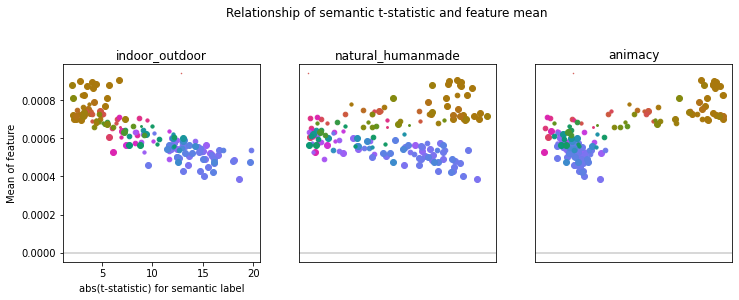

In [202]:
# Plot relationship between feature channels' variance, and semantic informativeness

n_color_steps = n_ori
# colors = cm.plasma(np.linspace(0,1,n_color_steps))
colors = cmocean.cm.phase(np.linspace(0,1,n_color_steps))

n_size_steps = n_bend
sizes = np.linspace(12,1,n_bend)
# sizes = np.linspace(12,12,n_sf)

# dorder = [0,2,3,4,1,5]

plt.figure(figsize=(12,8))
npx = 2
npy = 3

pi=0

for dd in range(3):

#     xlims = [1, 17]
#     ylims = [0.00013, 0.0013]
#     xlims = [np.min(np.mean(discrim_result[:,:,dd], axis=1))-0.02, \
#              np.max(np.mean(discrim_result[:,:,dd], axis=1))+0.02]
#     ylims = [np.min(np.mean(var_result, axis=1))-0.000002, \
#              np.max(np.mean(var_result, axis=1))+0.000002]

    running_xmin=100; running_ymin=100;
    running_xmax=-100; running_ymax=-100;
    pi+=1
    plt.subplot(npx,npy,pi)
 
    xvals = np.mean(np.abs(discrim_result[:,:,dd]), axis=1)
    yvals = np.mean(mean_result, axis=1)

    running_xmin = np.min([running_xmin, np.min(xvals)])
    running_ymin = np.min([running_ymin, np.min(yvals)])
    running_xmax = np.max([running_xmax, np.max(xvals)])
    running_ymax = np.max([running_ymax, np.max(yvals)])

    for oo in range(n_ori):
#                     inds = np.where(orient_inds==oo)[0]
#                     plt.plot(np.mean(xvals[inds]), np.mean(yvals[inds]), '.',\
#                              color=colors[oo,:], markersize=sizes[sf])
        for bb in range(n_bend):
            inds = np.where((ori_inds==oo) & (bend_inds==bb))[0]
            plt.plot(xvals[inds], yvals[inds],'.',color=colors[oo,:], markersize=sizes[bb])
                
    if pi==1:
        plt.xlabel('abs(t-statistic) for semantic label')
        plt.ylabel('Mean of feature')
    else:
        plt.xticks([])
        plt.yticks([])

    plt.axhline(0,color=[0.8, 0.8, 0.8])
    plt.title(discrim_type_list[dd])

#     plt.xlim(xlims)
#     plt.ylim(ylims)
    
plt.suptitle('Relationship of semantic t-statistic and feature mean');
    
print([running_xmin, running_xmax])
print([running_ymin, running_ymax])


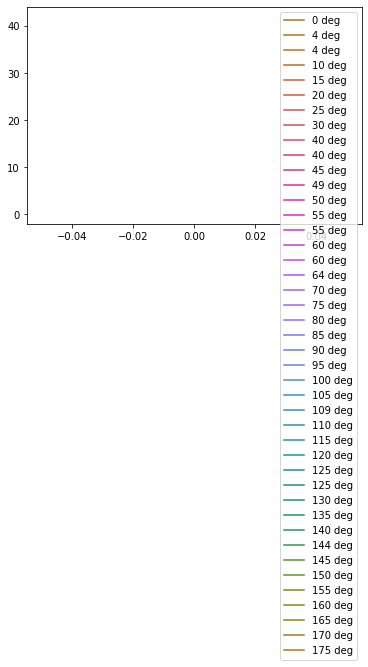

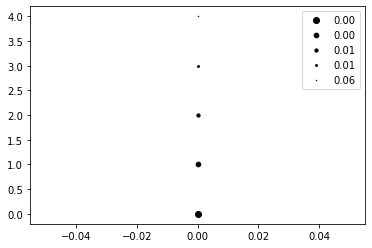

In [203]:
plt.figure();
for oo in range(n_ori):
    plt.plot(0,oo,color=colors[oo,:])    
plt.legend(['%d deg'%ori_unique[oo] for oo in range(n_ori)])

plt.figure();
for bb in range(n_bend):
    plt.plot(0,bb,'.',markersize=sizes[bb],color='k')    
plt.legend(['%.2f'%bend_unique[bb] for bb in range(n_bend)])

number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]


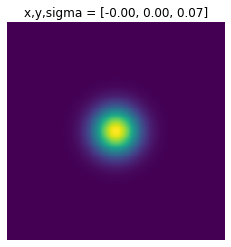

In [204]:
# To build more intuition going to load a few images and plot those that have highest activation for 
# a given feature type. Can get an idea of what image components these features relate to. 

from utils import prf_utils
which_prf_grid=5
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)
n_prfs = len(models)
mm = 400

x,y,sigma = models[mm,:]
n_pix = 240
prf_2d = prf_utils.gauss_2d(center=[x,y], sd=sigma, patch_size=n_pix)

plt.figure();
plt.pcolormesh(prf_2d)
plt.axis('off')
plt.axis('square')
plt.gca().invert_yaxis()
plt.title('x,y,sigma = [%.2f, %.2f, %.2f]'%(x,y,sigma));

In [205]:
# load a set of gabor features

from feature_extraction import fwrf_features
subject=1
feat_loader = fwrf_features.fwrf_feature_loader(subject=subject ,which_prf_grid=which_prf_grid,\
                                                feature_type='sketch_tokens',use_pca_feats=False)
ims2use = np.arange(0,1000)
features_in_prf, defin = feat_loader.load(ims2use,mm)
features_in_prf.shape

number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]
Loading pre-computed features for models [400 - 499] from /user_data/mmhender/features/sketch_tokens/S1_features_each_prf_grid5.h5py
Took 74.89242 seconds to load file
Size of features array for this image set is:
(1000, 150, 100)
Index into batch for prf 400: 0
Size of features array for this image set and prf is:
(1000, 150)
Final size of feature matrix is:
(1000, 150)


(1000, 150)

In [206]:
image_data = nsd_utils.get_image_data(subject)
image_data = image_data[ims2use,:,:,:]
image_data = nsd_utils.image_uncolorize_fn(image_data)

image_data.shape


Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255


(1000, 1, 240, 240)

In [102]:
labels_folder = os.path.join(default_paths.stim_labels_root, \
                     'S%d_within_prf_grid%d'%(subject,which_prf_grid))
labels_fn = os.path.join(default_paths.stim_labels_root,'S%d_within_prf_grid%d'%(subject, which_prf_grid), \
                 'S%d_concat_prf%d.csv'%(subject, mm))
print('loading from %s'%(labels_fn))
coco_df = pd.read_csv(labels_fn, index_col=0)


loading from /user_data/mmhender/nsd/labels/S1_within_prf_grid5/S1_concat_prf400.csv


In [103]:
dd = 0

labels = np.array(coco_df[discrim_type_list[dd]])[ims2use]
inds2use = ~np.isnan(labels)

labels.shape

(1000,)

In [209]:
# Get sketch tokens feature representations

from scipy.io import loadmat
cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
clusters = clust['clusters']['clusters'][0][0]
clusters.shape

(31, 31, 150)

In [213]:
ff

array([56])

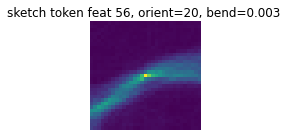

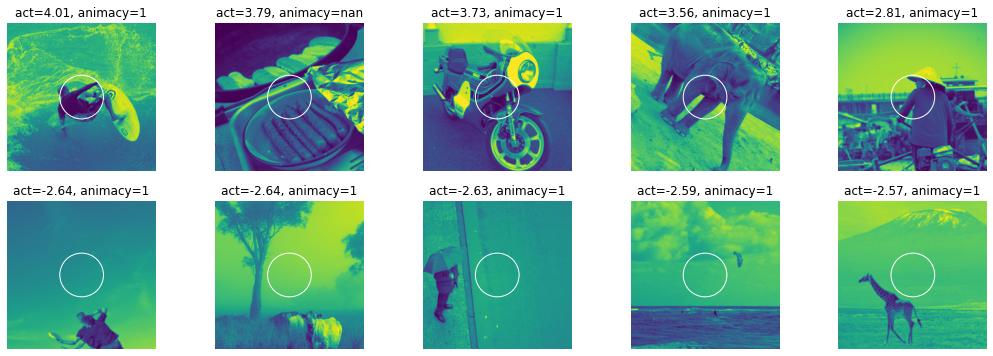

In [218]:
oo=5;
bb=1;
ff = np.where((ori_inds==oo) & (bend_inds==bb))[0][0]

zvals = scipy.stats.zscore(features_in_prf[:,ff])

feature_im = clusters[:,:,ff]

plt.figure(figsize=(2,2));
plt.pcolormesh(feature_im.T)
plt.gca().invert_yaxis()
plt.axis('off')
plt.suptitle('sketch token feat %d, orient=%d, bend=%.3f'%(ff, ori_unique[oo], bend_unique[bb]))

top_n = 5
top_image_inds = np.flip(np.argsort(zvals))[0:top_n]
bottom_image_inds = np.argsort(zvals)[0:top_n]
top_resp = zvals[top_image_inds]
bottom_resp = zvals[bottom_image_inds]
top_images = image_data[top_image_inds,0,:,:]
bottom_images = image_data[bottom_image_inds,0,:,:]

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(18,6));
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1);
    plt.imshow(top_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f, %s=%.0f'%(top_resp[ii], discrim_type_list[dd], labels[top_image_inds[ii]]))
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1+top_n);    
    plt.imshow(bottom_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f, %s=%.0f'%(bottom_resp[ii], discrim_type_list[dd], labels[bottom_image_inds[ii]]))


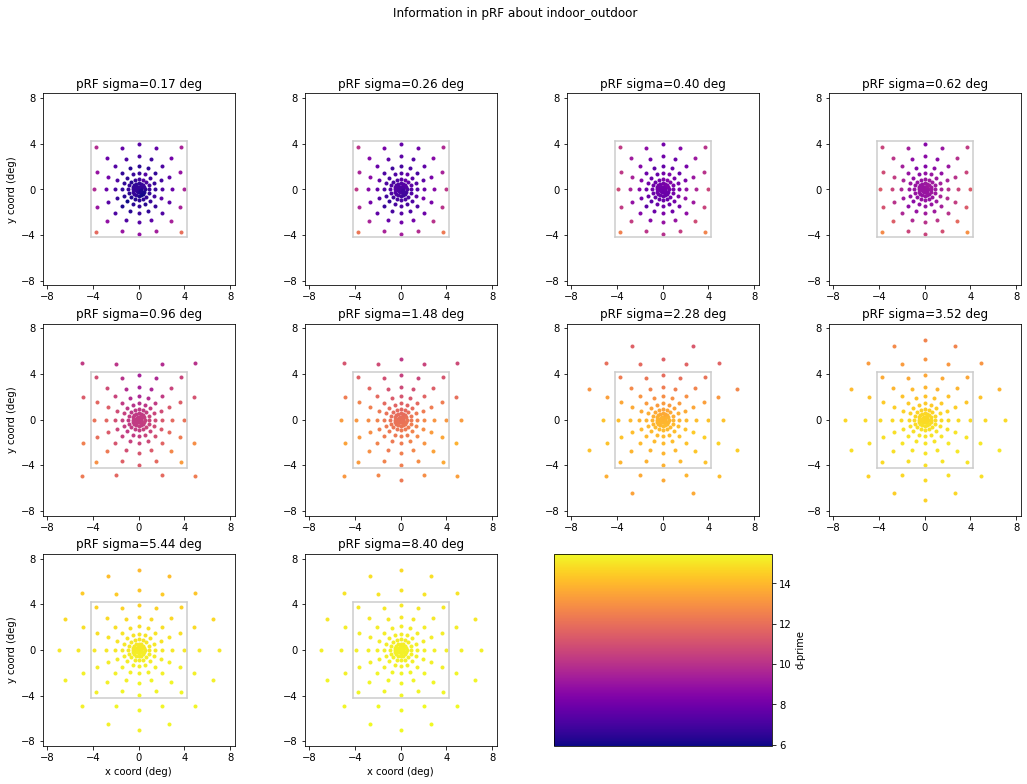

In [118]:
discrim_type = discrim_type_list[dd]

prf_models = models

unique_sizes = np.unique(np.round(prf_models[:,2],4))

fig = plt.figure(figsize=(18,12));

n_color_steps = 100
colors = cm.plasma(np.linspace(0,1,n_color_steps))
min_tstat = 0.5
tstat_vals = np.mean(np.abs(discrim_result[:,:,dd]), axis=0)
# tstat_vals = np.max(discrim_result, axis=0)
tstat_range = [np.min(tstat_vals[tstat_vals>min_tstat]), \
                np.max(tstat_vals[tstat_vals>min_tstat])]
# tstat_range = [0, 1.4]
tstat_steps = np.linspace(tstat_range[0], tstat_range[1], n_color_steps)
screen_eccen_deg = 8.4
xylims = 1.0*screen_eccen_deg

for si, size in enumerate(unique_sizes):

    inds = np.where(np.round(prf_models[:,2],4)==size)[0]

    prf_models_plot = models[inds,:]
    tstat_plot = tstat_vals[inds]
    inds2plot = np.where(tstat_plot>min_tstat)[0]
    
    plt.subplot(3,4,si+1)
    ax = plt.gca()
        
    for mm in inds2plot:
        x,y,sigma = prf_models_plot[mm,:]
        tstat = tstat_plot[mm]
        color_ind = np.argmin(np.abs(tstat_steps-tstat))
        plt.plot(x*screen_eccen_deg,y*screen_eccen_deg,'.', color=colors[color_ind,:])  
        
    plt.axis('square')
    plt.xlim([-xylims, xylims])
    plt.ylim([-xylims, xylims])
    plt.xticks(np.arange(-8,9,4))
    plt.yticks(np.arange(-8,9,4))
    
    plt.plot([screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,-screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [-screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])

    if si>7:
        plt.xlabel('x coord (deg)')
    if np.mod(si,4)==0:
        plt.ylabel('y coord (deg)')

    plt.title('pRF sigma=%.2f deg'%(size*screen_eccen_deg))
    
ax = plt.subplot(3,4,si+2)
scalmap = cm.ScalarMappable(matplotlib.colors.Normalize(vmin=tstat_range[0], vmax=tstat_range[1]),\
                  cmap='plasma')
fig.colorbar(scalmap, orientation='vertical', label='d-prime',cax=ax)

plt.suptitle('Information in pRF about %s'%discrim_type);

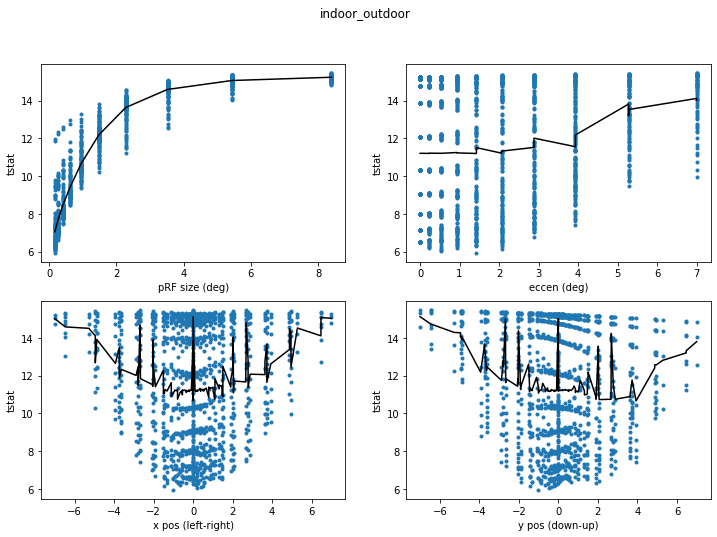

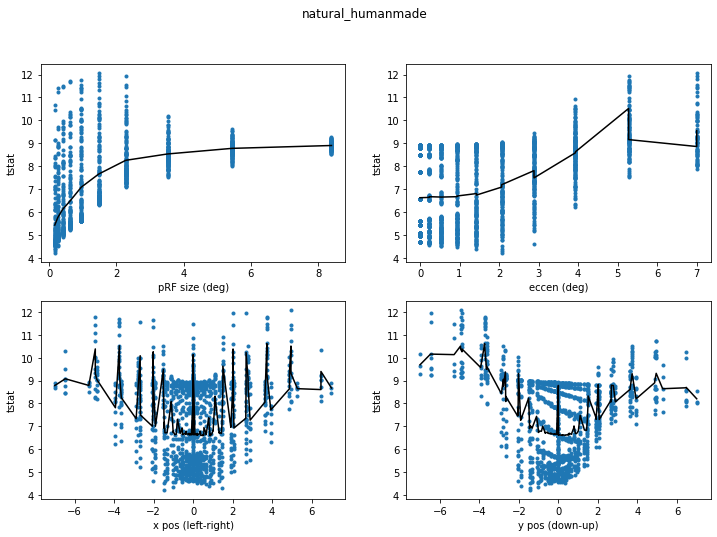

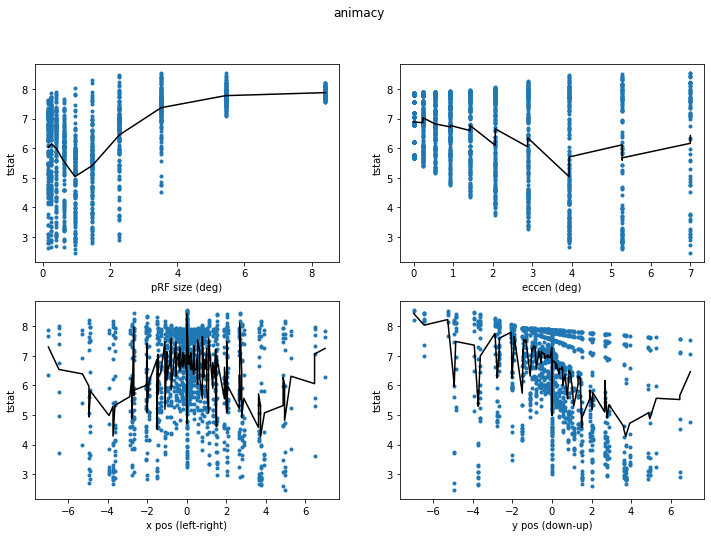

In [119]:
# for dd, discrim_type in enumerate(discrim_type_list):
for dd in range(3):
    discrim_type = discrim_type_list[dd]
    
    plt.figure(figsize=(12,8));
    tstat_vals = np.mean(np.abs(discrim_result[:,:,dd]), axis=0)

    plt.subplot(2,2,1)
    x_vals = models[:,2]*8.4
    plt.plot(x_vals, tstat_vals,'.')
    plt.plot(np.unique(x_vals), [np.mean(tstat_vals[x_vals==xv]) for xv in np.unique(x_vals)],'-',color='k')
    plt.xlabel('pRF size (deg)')
    plt.ylabel('tstat')

    plt.subplot(2,2,2)
    x_vals = np.sqrt(models[:,0]**2+models[:,1]**2)*8.4
    plt.plot(x_vals, tstat_vals,'.')
    plt.plot(np.unique(x_vals), [np.mean(tstat_vals[x_vals==xv]) for xv in np.unique(x_vals)],'-',color='k')
    plt.xlabel('eccen (deg)')
    plt.ylabel('tstat')

    plt.subplot(2,2,3)
    x_vals = models[:,0]*8.4
    plt.plot(x_vals, tstat_vals,'.')
    plt.plot(np.unique(x_vals), [np.mean(tstat_vals[x_vals==xv]) for xv in np.unique(x_vals)],'-',color='k')
    plt.xlabel('x pos (left-right)')
    plt.ylabel('tstat')

    plt.subplot(2,2,4)
    x_vals = models[:,1]*8.4
    plt.plot(x_vals, tstat_vals,'.')
    plt.plot(np.unique(x_vals), [np.mean(tstat_vals[x_vals==xv]) for xv in np.unique(x_vals)],'-',color='k')
    plt.xlabel('y pos (down-up)')
    plt.ylabel('tstat')
    
    plt.suptitle('%s'%discrim_type)

/home/mmhender/myenv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/mmhender/myenv/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'eccen values')

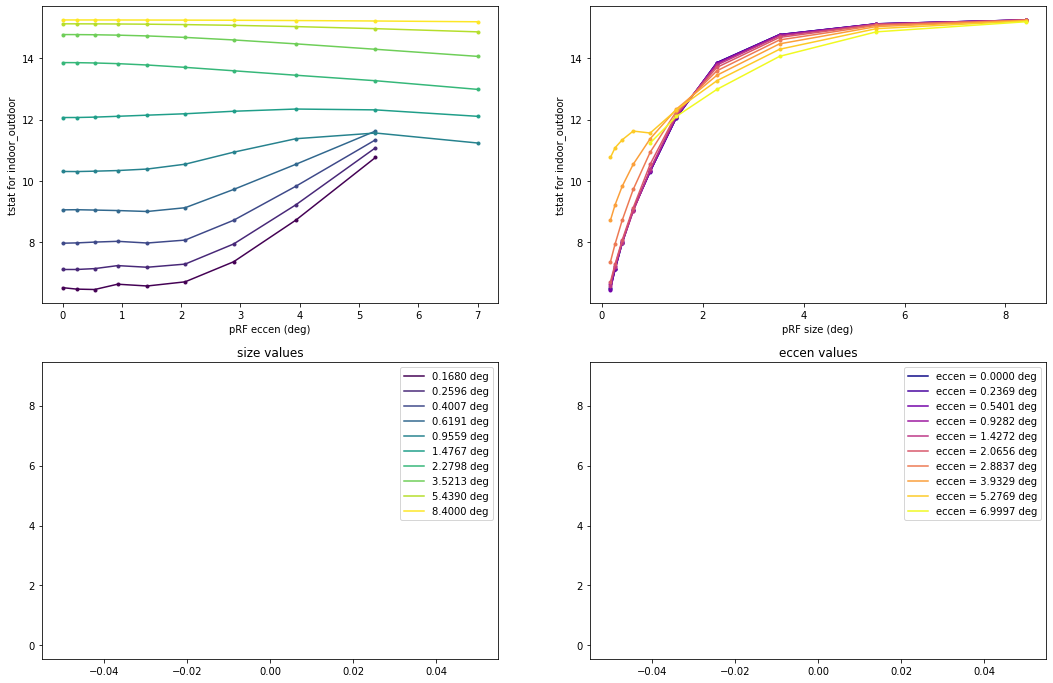

In [120]:
dd=0;

prf_models = models
neach = np.array([np.sum(out['best_params'][5][:,0]==mm) for mm in range(n_prfs)])
unique_sizes, size_inds = np.unique(np.round(prf_models[:,2],4), return_inverse=True)
eccens = np.sqrt(prf_models[:,0]**2+prf_models[:,1]**2)
unique_eccens, eccen_inds = np.unique(np.round(eccens,4), return_inverse=True)

tstat_vals = np.mean(np.abs(discrim_result[:,:,dd]), axis=0)
tstat_size_by_eccen = np.array([[np.mean(tstat_vals[(size_inds==si) & (eccen_inds==ei)]) \
                        for ei in range(len(unique_eccens))] for si in range(len(unique_sizes))])

fig = plt.figure(figsize=(18,12));

eccen_colors = cm.plasma(np.linspace(0,1,len(unique_eccens)))
size_colors = cm.viridis(np.linspace(0,1,len(unique_sizes)))

plt.subplot(2,2,1)
for si, size in enumerate(unique_sizes):

    xvals = unique_eccens*8.4
    yvals = tstat_size_by_eccen[si,:]
    
    plt.plot(xvals, yvals, '.-',color=size_colors[si,:])
    plt.xlabel('pRF eccen (deg)')
    plt.ylabel('tstat for %s'%discrim_type_list[dd])

plt.subplot(2,2,2)
for ei, ecc in enumerate(unique_eccens):

    xvals = unique_sizes*8.4
    yvals = tstat_size_by_eccen[:,ei]

    plt.plot(xvals, yvals, '.-', color=eccen_colors[ei,:])
    plt.xlabel('pRF size (deg)')
    plt.ylabel('tstat for %s'%discrim_type_list[dd])

plt.subplot(2,2,3)
for ss in range(len(unique_sizes)):
        plt.plot(0,ss,color=size_colors[ss,:])    
plt.legend(['%.4f deg'%(unique_sizes[ss]*8.4) for ss in range(len(unique_sizes))])
plt.title('size values')

plt.subplot(2,2,4)
for ee in range(len(unique_eccens)):
    plt.plot(0,ee,color=eccen_colors[ee,:])    
plt.legend(['eccen = %.4f deg'%(unique_eccens[ee]*8.4) for ee in range(len(unique_eccens))])
plt.title('eccen values')

